In [25]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np


from skimage import io, color
from skimage.util import img_as_ubyte
from skimage.morphology import disk, opening, erosion, dilation, closing

import matplotlib.pyplot as plt

## 1. Citra Fingerprint

### a. Hilangkan noise titik-titik

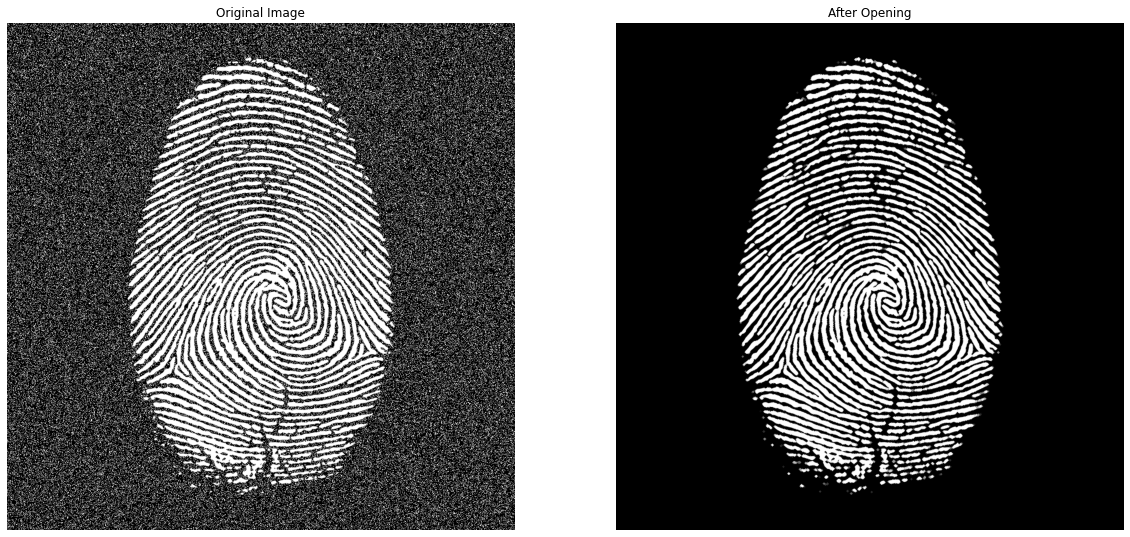

In [9]:
# Import and change image to gray
finger = io.imread('Tugas Lab 3 - Images/noisy_fingerprint.jpg')

finger_gray = color.rgb2gray(finger)

# You can change the structuring element (se)
# Read skimage.morphology documentation for more
strel = disk(2)
opened = opening(finger_gray, se)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(finger_gray, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Opening')
plt.imshow(opened, cmap='gray')
plt.axis('off')
plt.show()

### b. Mengapa mengerjakan dengan cara di atas

- Ada banyak noise di sekitar area finger print dan tidak ada objek penting di area itu.
- Dengan hanya melakukan erosion, kita memang bisa menghilangkan noise di sekitar fingerprint. Namun, boundary dari fingerprint itu sendiri banyak yang hilang.
- Jika hanya melakukan dilation, area berwarna putihnya menyebar, sehingga gambar menjadi dominan putih. Hal ini terjadi karena pixel-pixel noise yang awalnya ukurannya kecil, menjadi lebih besar karena kita menambahkan boundary.
- Jika melakukan closing, dilasi di awal menyebabkan area putihnya menyebar. Melakukan erosi pada gambar ini seakan hanya mengurangi boundary yang baru saja kita buat. Bahkan tidak semua boundary yang ditambahkan hilang setelah erosi karena bisa saja membentuk connected component. Pada kasus ini, dilasi justru menghasilkan gambar dengan noise yang lebih banyak.

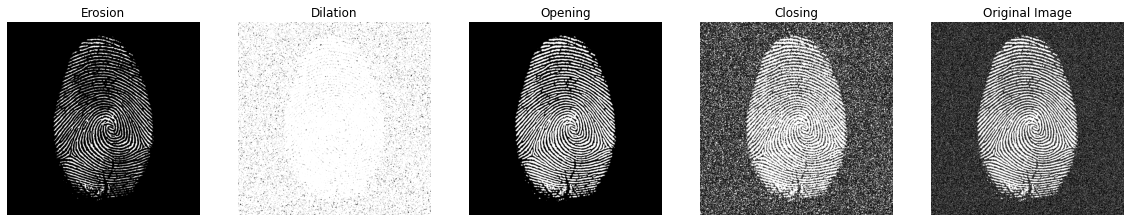

In [27]:
eroded = erosion(finger_gray, strel)
dilated = dilation(finger_gray, strel)
closed = closing(finger_gray)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
plt.title('Erosion')
plt.imshow(eroded, cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.title('Dilation')
plt.imshow(dilated, cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.title('Opening')
plt.imshow(opened, cmap='gray')
plt.axis('off')
plt.subplot(1,5,4)
plt.title('Closing')
plt.imshow(closed, cmap='gray')
plt.axis('off')
plt.subplot(1,5,5)
plt.title('Original Image')
plt.imshow(finger_gray, cmap='gray')
plt.axis('off')
plt.show()

### c. Perbedaan dengan mean dan median filtering

- Ada banyak noise di sekitar area finger print dan tidak ada objek penting di area itu untuk dipertahankan.
- Maka, yang harus dilakukan adalah menghapus noise, bukan melakukan smoothing.
- Mean dan median filtering digunakan untuk smoothing gambar, sehingga gambar yang dihasilkan menjadi blur.
- Cara opening menghilangkan noise adalah dengan melakukan erosi, yaitu dengan menghilangkan object boundaries, kemudian melakukan dilasi untuk mengembalikan object boundary sehingga object boundary menyerupai kondisi awal.

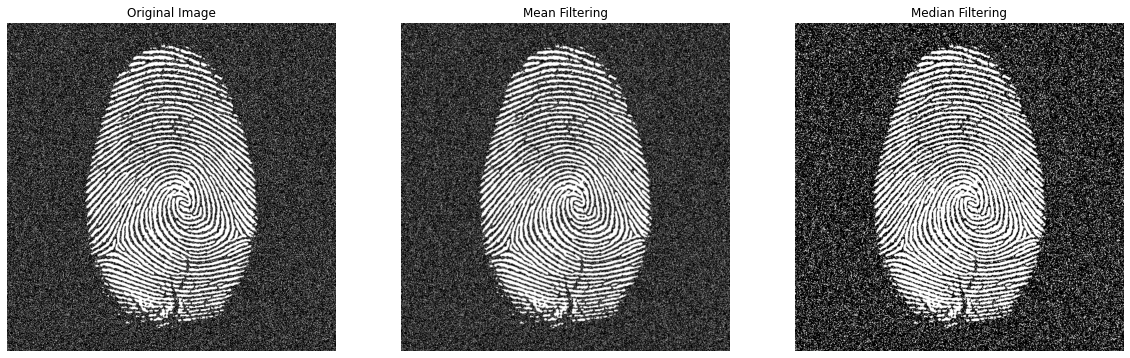

In [23]:
from skimage import morphology
from skimage import filters

# Median and mean filtering
finger_gray_mean = filters.rank.mean(finger_gray, selem=morphology.square(2))
finger_gray_median = filters.rank.median(finger_gray, selem=morphology.square(2))

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(finger_gray, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Mean Filtering')
plt.imshow(finger_gray_mean, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Median Filtering')
plt.imshow(finger_gray_median, cmap='gray')
plt.axis('off')
plt.show()

## 2. Citra Pesan Rahasia

In [30]:
import scipy
from scipy.ndimage.morphology import binary_hit_or_miss 

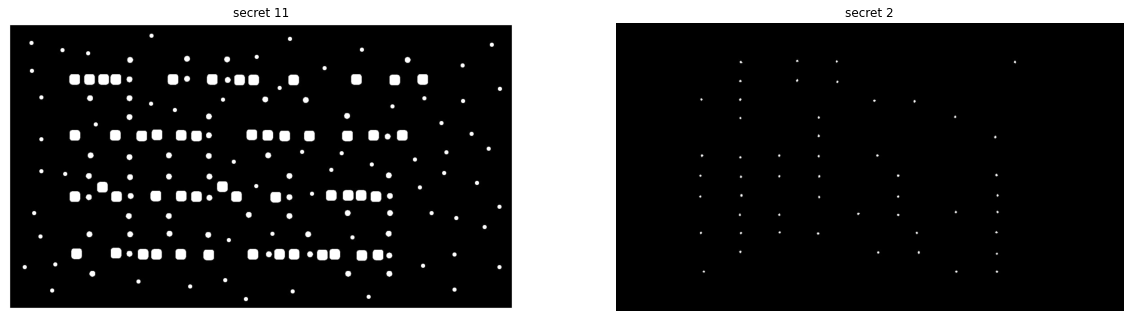

In [32]:
secret11 = io.imread('Tugas Lab 3 - Images/secret11.jpg')
secret2 = io.imread('Tugas Lab 3 - Images/secret2.jpg')

secret11_gray = color.rgb2gray(secret11)
secret2_gray = color.rgb2gray(secret2)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('secret 11')
plt.imshow(secret11_gray, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('secret 2')
plt.imshow(secret2_gray, cmap='gray')
plt.axis('off')
plt.show()

### a. Lakukan operasi ​hit or miss​ dengan kernel rectangle berukuran 18x18 terhadap citra secret11 untuk mendapatkan citra secret1.

In [47]:
from skimage.morphology import diamond, star, rectangle

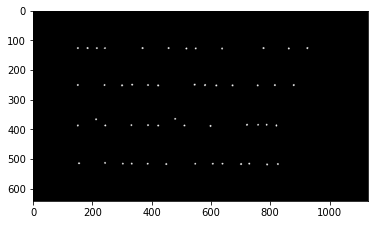

In [48]:
kernel1 = rectangle(18, 18)
secret1 = binary_hit_or_miss(secret11_gray, kernel1)

plt.imshow(secret1, cmap='gray')

### b. Menggunakan kernel untuk dilatasi

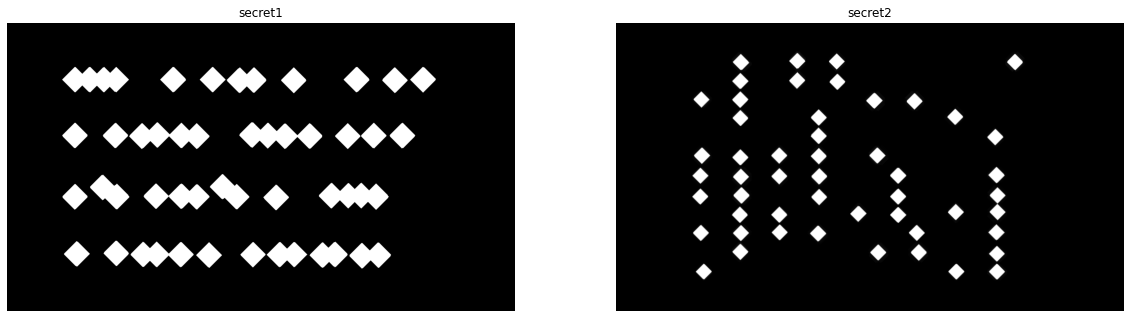

In [59]:
diamond25 = diamond(25)
diamond15 = diamond(15)

secret1_gray_dilated1 = dilation(secret1, diamond25)
secret2_gray_dilated1 = dilation(secret2_gray, diamond15)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('secret1')
plt.imshow(secret1_gray_dilated1, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('secret2')
plt.imshow(secret2_gray_dilated1, cmap='gray')
plt.axis('off')
plt.show()

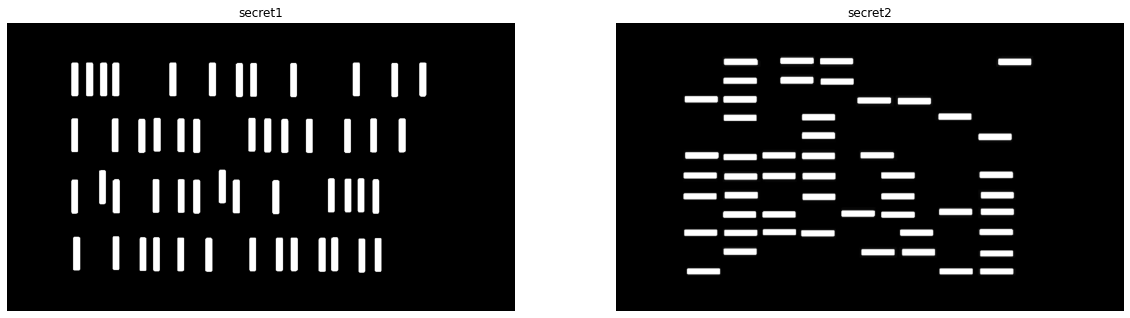

In [60]:
rectangle7010 = rectangle(70,10)
rectangle1070 = rectangle(10,70)

secret1_gray_dilated2 = dilation(secret1, rectangle7010)
secret2_gray_dilated2 = dilation(secret2_gray, rectangle1070)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('secret1')
plt.imshow(secret1_gray_dilated2, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('secret2')
plt.imshow(secret2_gray_dilated2, cmap='gray')
plt.axis('off')
plt.show()

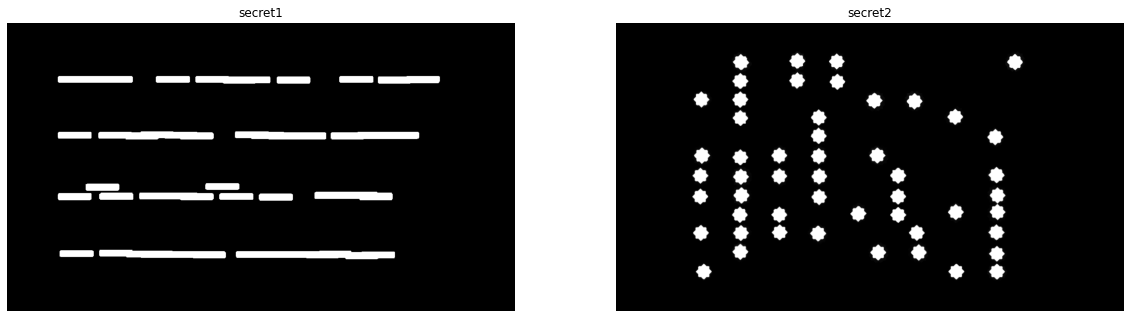

In [61]:
rectangle1070 = rectangle(10,70)
star10 = star(10)

secret1_gray_dilated3 = dilation(secret1, rectangle1070)
secret2_gray_dilated3 = dilation(secret2_gray, star10)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('secret1')
plt.imshow(secret1_gray_dilated3, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('secret2')
plt.imshow(secret2_gray_dilated3, cmap='gray')
plt.axis('off')
plt.show()

### c. Menggabungkan citra hasil dilatasi

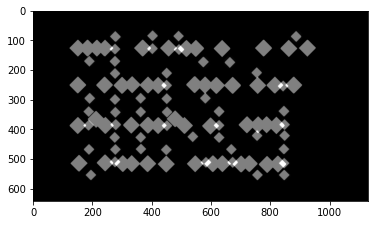

In [64]:
pesan1 = secret1_gray_dilated1 + secret2_gray_dilated1

plt.imshow(pesan1, cmap='gray')

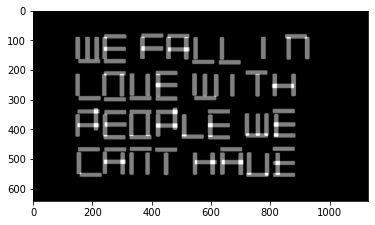

In [65]:
pesan2 = secret1_gray_dilated2 + secret2_gray_dilated2

plt.imshow(pesan2, cmap='gray')

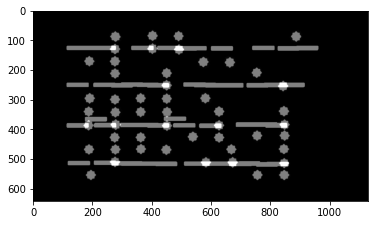

In [66]:
pesan3 = secret1_gray_dilated3 + secret2_gray_dilated3

plt.imshow(pesan3, cmap='gray')

### d. Tuliskan pesan rahasia

## WE FALL IN LOVE WITH PEOPLE WE CANT HAVE